In [1]:
import pandas as pd

/scratch/gilbreth/iyer95/conda_envs/plot/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/scratch/gilbreth/iyer95/conda_envs/plot/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


# Gramacy Time Scatter plot

Scatter plot saved as Gramacy_timeMSE_scatterplot.png
Scatter plot saved as Gramacy_timeMSE_scatterplot.svg
Updated SVG saved as scatter_plot_fixed.svg


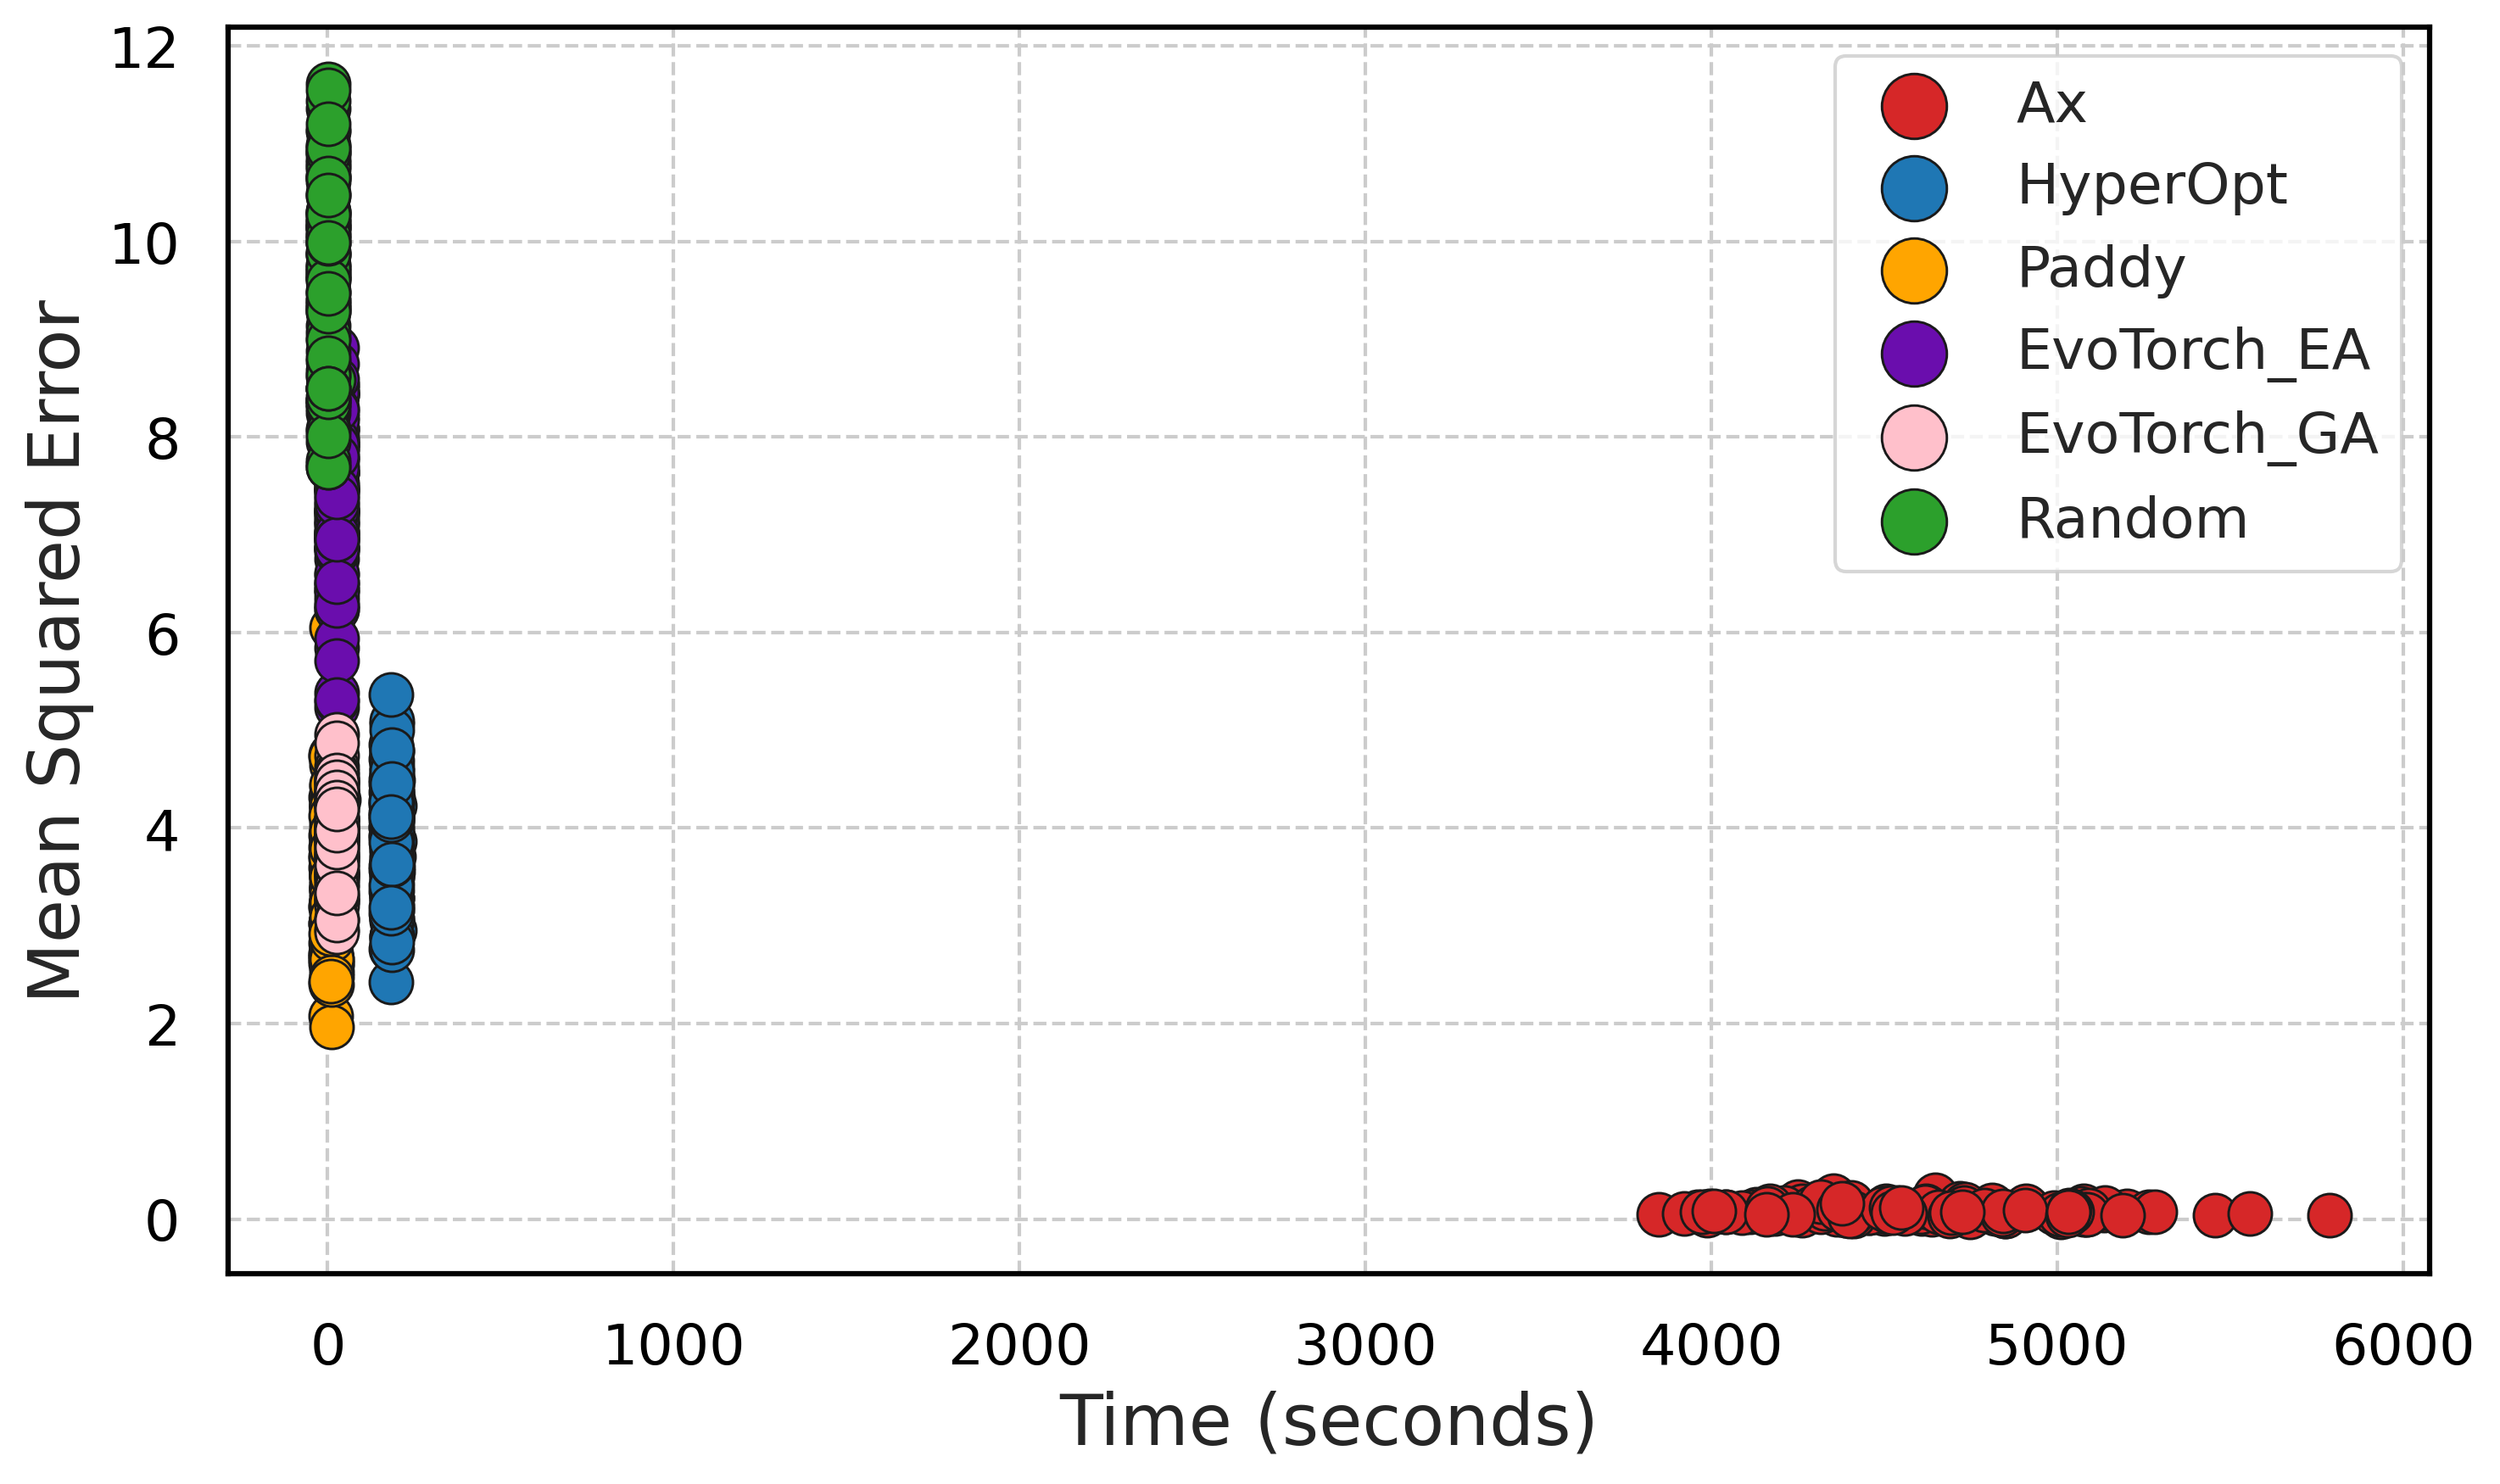

In [2]:
import os
import re
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

def add_px_to_font_size(svg_path, output_svg_path):
    """
    Post-processes an SVG file to append 'px' to all font-size attributes.
    
    Parameters:
    - svg_path (str): Path to the original SVG file.
    - output_svg_path (str): Path to save the modified SVG file.
    """
    try:
        with open(svg_path, 'r') as file:
            svg_content = file.read()
        
        # Regex to find font-size="number" and replace with font-size="numberpx"
        svg_content = re.sub(r'font-size="(\d+)"', r'font-size="\1px"', svg_content)
        
        with open(output_svg_path, 'w') as file:
            file.write(svg_content)
        
        print(f"Updated SVG saved as {output_svg_path}")
    except Exception as e:
        print(f"An error occurred while processing the SVG: {e}")

def plot_scatter_multiple_files(file_paths, label_mapping, color_mapping=None, figsize=(10, 6), 
                                png_filename='scatter_plot.png', svg_filename='scatter_plot.svg',
                                svg_fixed_filename='scatter_plot_fixed.svg'):
    """
    Plots a scatter plot of Time vs MSE for multiple files with custom labels and colors,
    and saves the plot in both PNG and SVG formats.
    
    Additionally, post-processes the SVG to add 'px' units to font-size attributes
    for better compatibility with Affinity Designer.
    
    Parameters:
    - file_paths (list of str): List of file paths to import data from.
    - label_mapping (dict): Dictionary mapping file names to custom labels.
                             Example: {'file1.csv': 'Ax', 'file2.csv': 'Bx'}
    - color_mapping (dict, optional): Dictionary mapping labels to specific colors.
                                     Example: {'Ax': '#D62728', 'Bx': '#FFC0CB'}
    - figsize (tuple, optional): Size of the matplotlib figure. Default is (10, 6).
    - png_filename (str, optional): Filename for saving the plot in PNG format. Default is 'scatter_plot.png'.
    - svg_filename (str, optional): Filename for saving the plot in SVG format. Default is 'scatter_plot.svg'.
    - svg_fixed_filename (str, optional): Filename for saving the post-processed SVG. Default is 'scatter_plot_fixed.svg'.
    """
    # Set global font and SVG settings
    mpl.rcParams.update({
        'svg.fonttype': 'none',        # Keep text as text in SVG
        'font.size': 20,               # Base font size for all text
        'font.family': 'Arial',        # Use a universal font
        'axes.titlesize': 20,          # Font size for axis titles
        'axes.labelsize': 20,          # Font size for axis labels
        'xtick.labelsize': 20,         # Font size for x-axis ticks
        'ytick.labelsize': 20,         # Font size for y-axis ticks
        'legend.fontsize': 16,         # Font size for legend text
        'legend.title_fontsize': 16    # Font size for legend title
    })

    # Use Seaborn for enhanced aesthetics
    sns.set(style="whitegrid")

    # Initialize the plot with specified DPI for high-resolution output
    plt.figure(figsize=figsize, dpi=300)

    # Define a default soft color palette for labels without specific color assignments
    default_soft_colors = [
        '#70C1B3',  # Muted Teal
        '#B2DBBF',  # Soft Green
        '#F3FFBD',  # Pale Yellow
        '#FFB347',  # Soft Orange
        '#FFAAA5',  # Soft Red
        '#77DD77',  # Soft Green
        '#CFCFC4',  # Pastel Gray
        '#836953',  # Pastel Brown
        '#A8D5BA'   # Another Soft Green
    ]

    # Initialize color index for default colors
    color_idx = 0

    # Keep track of used labels to avoid duplicate legend entries
    used_labels = set()

    for file_path in file_paths:
        # Extract the file name from the path
        file_name = os.path.basename(file_path)
        
        # Get the custom label; use file name if not provided in mapping
        label = label_mapping.get(file_name, file_name)
        
        # Assign color based on color_mapping; fallback to default palette
        if color_mapping and label in color_mapping:
            color = color_mapping[label]
        else:
            color = default_soft_colors[color_idx % len(default_soft_colors)]
            color_idx += 1

        try:
            # Read the data
            df = pd.read_csv(file_path)

            # Check if required columns exist
            if not {'Time', 'MSE'}.issubset(df.columns):
                print(f"Warning: 'Time' or 'MSE' column missing in {file_name}. Skipping this file.")
                continue

            # Plot the scatter points with updated settings
            plt.scatter(
                df['Time'], 
                df['MSE'], 
                color=color, 
                alpha=1.0,           # Fully opaque markers
                edgecolors='k',      # Black edges for better contrast
                linewidth=0.7,       # Slight edge linewidth for clarity
                s=150,               # Adjusted size for better balance
                label=label if label not in used_labels else "",
                marker='o'           # Circle marker for better visibility
            )

            used_labels.add(label)  # Add label to the set after plotting
        except FileNotFoundError:
            print(f"Error: File {file_path} not found. Skipping this file.")
        except pd.errors.EmptyDataError:
            print(f"Error: File {file_path} is empty. Skipping this file.")
        except Exception as e:
            print(f"An error occurred while processing {file_path}: {e}. Skipping this file.")

    # Label the axes
    plt.xlabel('Time (seconds)', fontsize=20)
    plt.ylabel('Mean Squared Error', fontsize=20)
    
    # Set tick label sizes
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Thicken and set the color of all spines to black
    ax = plt.gca()  # Get current axes
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)  # Set linewidth to 1.5
        spine.set_color('black')   # Set color to black

    # Ensure tick marks are visible and styled appropriately
    plt.tick_params(
        axis='both',        # Apply to both x and y axes
        which='both',       # Apply to major and minor ticks
        direction='out',    # Tick marks point outwards
        length=10,          # Length of the tick marks in points
        width=2,            # Thickness of the tick marks
        colors='black'      # Color of the tick marks
    )

    # Add gridlines for easier interpretation
    plt.grid(True, linestyle='--', alpha=1) 

    # Add a legend with larger markers
    plt.legend(fontsize=16, title_fontsize=16, markerscale=1.5, frameon=True)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Save the plot as PNG
    plt.savefig(png_filename, dpi=300, bbox_inches='tight')
    print(f"Scatter plot saved as {png_filename}")

    # Save the plot as SVG
    plt.savefig(svg_filename, dpi=300, bbox_inches='tight')
    print(f"Scatter plot saved as {svg_filename}")

    # Post-process the SVG to add 'px' to font-size
    add_px_to_font_size(svg_filename, svg_fixed_filename)

    # Optionally, remove the original SVG if only the fixed one is needed
    # os.remove(svg_filename)

    # Show the plot
    plt.show()



# List of file paths
file_paths = [
    '../BO/Ax/ax_gramacy_06Dec24__500trialsK_CPUparallel_7528819_SUMMARY.csv',
    '../BO/hyperopt/gramacy_Hyperopt_11Jan25_7704032_ITERATIONS.csv',
    '../population/Paddy/Gramacy_Paddy_10Jan25_7687032_SUMMARY.csv',
    '../population/Evotorch/gramacy_evotorch_10Jan25_250pop_k_EA_7686636_REPEAT_SUMMARY.csv',
    '../population/Evotorch/gramacy_evotorch_10Jan25_250pop_paramplot_GA_7686802_REPEAT_SUMMARY.csv',
    '../BO/Random/RANDOM_gramacy_07Dec_1500trials_STANDBY_7532633_SUMMARY.csv'
]

# Mapping of file names to custom labels
label_mapping = {
    'ax_gramacy_06Dec24__500trialsK_CPUparallel_7528819_SUMMARY.csv': 'Ax',
    'gramacy_Hyperopt_11Jan25_7704032_ITERATIONS.csv': 'HyperOpt',
    'Gramacy_Paddy_10Jan25_7687032_SUMMARY.csv': 'Paddy',
    'gramacy_evotorch_10Jan25_250pop_k_EA_7686636_REPEAT_SUMMARY.csv': 'EvoTorch_EA',
    'gramacy_evotorch_10Jan25_250pop_paramplot_GA_7686802_REPEAT_SUMMARY.csv': 'EvoTorch_GA',
    'RANDOM_gramacy_07Dec_1500trials_STANDBY_7532633_SUMMARY.csv': 'Random'
}

# Define a custom color mapping for specific labels
color_mapping = {
    'Ax': '#D62728',          # Muted Red
    'HyperOpt': '#1F77B4',    # Muted Blue
    'Random': '#2CA02C',       # Green
    'Paddy': '#FFA500',        # Orange
    'EvoTorch_EA': '#6A0DAD',  # Purple
    'EvoTorch_GA': '#FFC0CB'   # Pink
}

# Plot and save the scatter plot
plot_scatter_multiple_files(
    file_paths, 
    label_mapping, 
    color_mapping=color_mapping, 
    png_filename='Gramacy_timeMSE_scatterplot.png', 
    svg_filename='Gramacy_timeMSE_scatterplot.svg',
    # svg_fixed_filename='Gramacy_timeMSE_scatterplot_fixed.svg'
)
